<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/Face_Recognition/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [66]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 18 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [67]:
train_dataset.classes
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'trang': 1, 'tuan': 2}

In [68]:
model = Sequential()
model.add(Conv2D(32,(5,5), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(64,(5,5), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(128,(5,5), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(5,5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        51264     
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [74]:
opt = SGD(learning_rate = 0.001, momentum = 0.5)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [75]:
history=model.fit(train_dataset,batch_size=32,epochs=10,verbose=1,validation_data=validation_dataset)

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 0.1572 - accuracy: 0.9444 - val_loss: 0.2773 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.2531 - accuracy: 0.8889 - val_loss: 0.4376 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.2503 - accuracy: 0.8889 - val_loss: 0.2544 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 0.1776 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.1438 - accuracy: 0.9444 - val_loss: 0.2665 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 0.1756 - accuracy: 0.9444 - val_loss: 0.2009 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 4s 2s/step - loss: 0.1759 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=========================

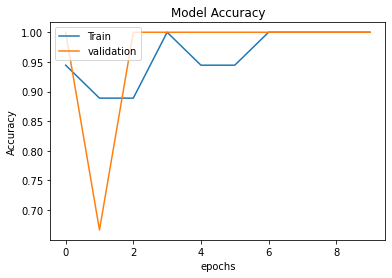

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [77]:
model.save('face_rec.h5')

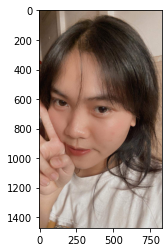

[1]


In [80]:
filename = '/content/data/trang/2021-10-28 23.34.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
print(kq)